In [8]:
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np
import math
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [9]:
energy_df = pd.read_csv('energy_data.csv')
fin_df = pd.read_csv('fin_data.csv')
mater_df = pd.read_csv('mater_data.csv')
cons_stap_df = pd.read_csv('cons_stap_data.csv')
indust_df = pd.read_csv('indust_data.csv')
comms_df = pd.read_csv('comms_data.csv')
real_df = pd.read_csv('real_data.csv')
tech_df = pd.read_csv('tech_data.csv')
util_df = pd.read_csv('util_data.csv')
cons_disc_df = pd.read_csv('cons_disc_data.csv')
health_df = pd.read_csv('health_data.csv')

energy_p = energy_df.pivot(index='date', columns='symbol', values='close')
fin_p = fin_df.pivot(index='date', columns='symbol', values='close')
mater_p = mater_df.pivot(index='date', columns='symbol', values='close')
util_p = util_df.pivot(index='date', columns='symbol', values='close')
cons_stap_p = cons_stap_df.pivot(index='date', columns='symbol', values='close')
cons_disc_p = cons_disc_df.pivot(index='date', columns='symbol', values='close')
tech_p = tech_df.pivot(index='date', columns='symbol', values='close')
real_p = real_df.pivot(index='date', columns='symbol', values='close')
comms_p = comms_df.pivot(index='date', columns='symbol', values='close')
indus_p = indust_df.pivot(index='date', columns='symbol', values='close')
health_p = health_df.pivot(index='date', columns='symbol', values='close')

energy_r = pd.read_csv('energy_returns.csv')
mater_r = pd.read_csv('mater_returns.csv')
fin_r = pd.read_csv('fin_returns.csv')
cons_stap_r = pd.read_csv('cons_stap_returns.csv')
indust_r = pd.read_csv('indust_returns.csv')
comms_r = pd.read_csv('comms_returns.csv')
real_r = pd.read_csv('real_returns.csv')
tech_r = pd.read_csv('tech_returns.csv')
util_r = pd.read_csv('util_returns.csv')
cons_disc_r = pd.read_csv('cons_disc_returns.csv')
health_r = pd.read_csv('health_returns.csv')

stock_r = pd.read_csv('stock_returns.csv')
stock_p = pd.read_csv('stock_prices.csv')

stocks_df = pd.read_csv('stocks_data.csv')

In [10]:
stocks_p = stocks_df.pivot(index='date', columns='symbol', values='close')
stocks_p

symbol,AAL,AAPL,ABT,AES,AIV,AMAT,AMD,AMT,APA,ARNC,...,VZ,WBA,WELL,WFC,WMB,WMT,WRK,WY,XEL,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-04-29,16.098623,55.064115,32.672105,11.459831,25.469300,13.026389,2.68,74.586380,66.377989,17.784866,...,41.160087,44.069162,55.574679,32.140202,28.113685,67.646306,NaN,24.654393,25.809094,72.549630
2013-04-30,16.184814,56.684852,32.841114,11.627617,25.534964,13.125897,2.82,75.439668,67.031244,17.953844,...,41.506552,44.149418,56.121143,32.225050,28.047483,67.068133,NaN,24.719209,25.980719,73.191152
2013-05-01,15.897510,56.238061,32.814428,11.577281,25.387221,13.089712,3.22,75.385776,66.613886,17.805988,...,40.343968,43.641133,56.188515,31.783843,27.591427,67.361534,NaN,24.419435,25.694677,71.973904
2013-05-02,16.223121,57.035628,32.965647,11.602449,25.387221,13.379187,3.41,75.313920,66.958660,17.869355,...,40.444058,43.587630,56.577778,31.741420,27.444312,67.706712,NaN,24.508557,25.621124,72.895065
2013-05-03,16.299736,57.606599,32.734372,11.594060,25.001447,13.415372,3.60,75.053443,68.265170,18.207310,...,40.559547,42.820744,56.641407,32.021416,27.613494,68.388439,NaN,24.832637,25.490362,74.038291
2013-05-06,16.280582,58.980257,31.889327,11.602449,25.518548,13.397280,3.61,74.622308,68.972864,18.355165,...,40.074495,42.660233,56.807777,32.157172,27.436956,68.026002,NaN,25.148615,25.073559,74.498871
2013-05-07,16.261429,58.717560,32.076126,11.711511,25.699123,13.315865,3.54,75.044461,69.589827,18.249554,...,40.744328,43.864065,57.185891,32.581409,27.201572,68.026002,NaN,25.424084,25.474017,74.967676
2013-05-08,16.606194,59.380961,32.280716,11.661175,25.740163,13.433464,3.83,76.014515,70.551564,18.735364,...,40.890614,43.801644,56.074237,32.878375,26.186478,67.931078,NaN,25.545614,25.212494,75.420032
2013-05-09,16.644501,58.866319,32.182869,11.090700,25.814035,13.496787,3.86,75.053443,73.917643,18.629753,...,40.582645,42.633481,56.490162,32.399522,27.113303,68.061298,NaN,25.936992,24.705792,75.387134


In [11]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = stocks_p.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['returns']
returns['volatility'] = stocks_p.pct_change().std() * math.sqrt(252)

In [12]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['returns']),np.asarray(returns['volatility'])]).T

Text(0,0.5,'Sum of Squared Errors')

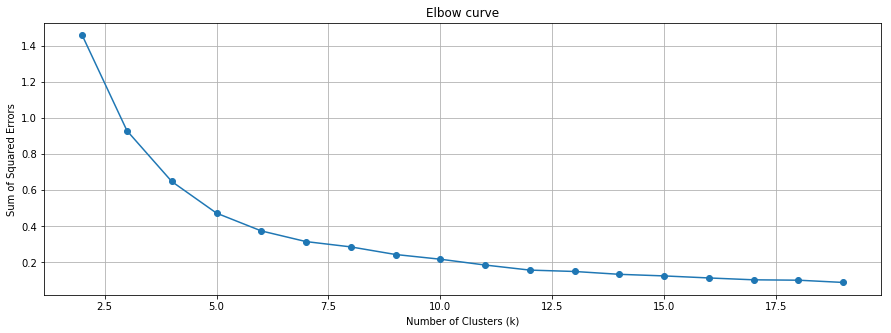

In [13]:
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, '-o')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')

It looks like 5-6 clusters should do the trick

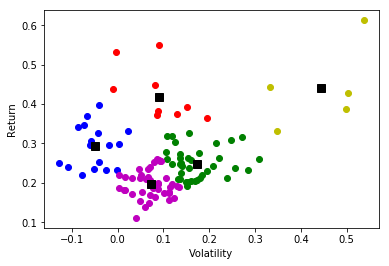

In [14]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=8)
plt.ylabel('Return')
plt.xlabel('Volatility')
plt.show()

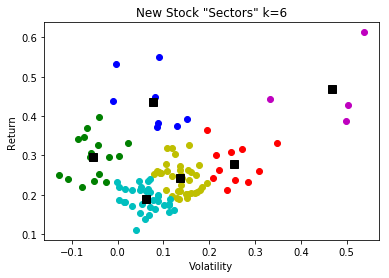

In [15]:
# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')
plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=8)
plt.ylabel('Return')
plt.xlabel('Volatility')
plt.title('New Stock "Sectors" k=6')
plt.show()

In [16]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
 
for detail in details:
    print(detail)

('AAL', 2)
('AAPL', 2)
('ABT', 1)
('AES', 1)
('AIV', 5)
('AMAT', 2)
('AMD', 4)
('AMT', 1)
('APA', 3)
('ARNC', 0)
('ATVI', 2)
('BA', 2)
('BAC', 1)
('BK', 1)
('BLL', 1)
('BMY', 1)
('BSX', 2)
('C', 5)
('CAT', 1)
('CBRE', 3)
('CELG', 1)
('CF', 0)
('CMCSA', 1)
('CNP', 5)
('COTY', 3)
('CSCO', 1)
('CSX', 2)
('CTL', 3)
('CVS', 5)
('CVX', 5)
('D', 5)
('DAL', 2)
('DHI', 1)
('DIS', 1)
('DVN', 3)
('DWDP', 3)
('EBAY', 1)
('EMR', 5)
('EXC', 5)
('F', 5)
('FB', 2)
('FCX', 0)
('FDX', 1)
('FE', 5)
('FOXA', 1)
('GE', 3)
('GILD', 1)
('GIS', 5)
('GM', 1)
('GPS', 3)
('HAL', 3)
('HBAN', 1)
('HBI', 1)
('HCP', 3)
('HST', 5)
('INTL', 1)
('IP', 5)
('IRM', 1)
('JCI', 5)
('JNJ', 5)
('JPM', 1)
('KEY', 1)
('KHC', 3)
('KIM', 5)
('KMI', 3)
('KO', 5)
('KR', 1)
('LLY', 1)
('LYB', 1)
('MO', 5)
('MOS', 3)
('MPC', 1)
('MRK', 1)
('MRO', 0)
('MS', 1)
('MSFT', 2)
('MU', 4)
('NEM', 0)
('NFLX', 4)
('NKE', 1)
('NRG', 0)
('NUE', 1)
('NVDA', 4)
('ORCL', 1)
('PCG', 3)
('PFE', 5)
('PG', 5)
('PLD', 1)
('PM', 5)
('PMM', 5)
('PPL', 5)


In [17]:
details_df = pd.DataFrame(details)


In [18]:
details_df.columns=['Ticker', 'Cluster']

In [19]:
details_group=details_df.groupby('Cluster').count()

In [20]:
details_group

,Ticker
Cluster,
0,8
1,38
2,11
3,16
4,4
5,33


In [27]:
details_T = details_group.transpose()
details_T

Cluster,0,1,2,3,4,5
Ticker,8,38,11,16,4,33


In [21]:
details_df
k0=details_df.loc[details_df['Cluster'] == 0]
k1=details_df.loc[details_df['Cluster'] == 1]
k2=details_df.loc[details_df['Cluster'] == 2]
k3=details_df.loc[details_df['Cluster'] == 3]
k4=details_df.loc[details_df['Cluster'] == 4]
k5=details_df.loc[details_df['Cluster'] == 5]

In [22]:
k0.set_index('Ticker')


,Cluster
Ticker,
ARNC,0
CF,0
FCX,0
MRO,0
NEM,0
NRG,0
TWTR,0
WMB,0


In [23]:
k1.set_index('Ticker')

,Cluster
Ticker,
ABT,1
AES,1
AMT,1
BAC,1
BK,1
BLL,1
BMY,1
CAT,1
CELG,1


In [24]:
k2.set_index('Ticker')

,Cluster
Ticker,
AAL,2
AAPL,2
AMAT,2
ATVI,2
BA,2
BSX,2
CSX,2
DAL,2
FB,2


In [25]:
k3.set_index('Ticker')

,Cluster
Ticker,
APA,3
CBRE,3
COTY,3
CTL,3
DVN,3
DWDP,3
GE,3
GPS,3
HAL,3


In [65]:
k4.set_index('Ticker')

,Cluster
Ticker,
APA,4
CBRE,4
COTY,4
CTL,4
DVN,4
DWDP,4
GE,4
GPS,4
HAL,4


In [66]:
k5.set_index('Ticker')

,Cluster
Ticker,
ARNC,5
CF,5
FCX,5
MRO,5
NEM,5
NRG,5
TWTR,5
WMB,5
